In [1]:
from spikingjelly.datasets.cifar10_dvs import CIFAR10DVS
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture

import torch
import torchvision
import numpy as np
import math
import matplotlib.pyplot as plt

/home/shihao/miniconda3/envs/spikingEnv/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def split_to_train_test_set(train_ratio: float, origin_dataset: torch.utils.data.Dataset, num_classes: int, random_split: bool = False):
    '''
    :param train_ratio: split the ratio of the origin dataset as the train set
    :type train_ratio: float
    :param origin_dataset: the origin dataset
    :type origin_dataset: torch.utils.data.Dataset
    :param num_classes: total classes number, e.g., ``10`` for the MNIST dataset
    :type num_classes: int
    :param random_split: If ``False``, the front ratio of samples in each classes will
            be included in train set, while the reset will be included in test set.
            If ``True``, this function will split samples in each classes randomly. The randomness is controlled by
            ``numpy.randon.seed``
    :type random_split: int
    :return: a tuple ``(train_set, test_set)``
    :rtype: tuple
    '''
    label_idx = []
    for i in range(num_classes):
        label_idx.append([])

    for i, item in enumerate(origin_dataset):
        y = item[1]
        if isinstance(y, np.ndarray) or isinstance(y, torch.Tensor):
            y = y.item()
        label_idx[y].append(i)
    train_idx = []
    test_idx = []
    if random_split:
        for i in range(num_classes):
            np.random.shuffle(label_idx[i])

    for i in range(num_classes):
        pos = math.ceil(label_idx[i].__len__() * train_ratio)
        train_idx.extend(label_idx[i][0: pos])
        test_idx.extend(label_idx[i][pos: label_idx[i].__len__()])

    return torch.utils.data.Subset(origin_dataset, train_idx), torch.utils.data.Subset(origin_dataset, test_idx)

def load_data(dataset_dir, T):
    # Data loading code
    print("Loading data")

    dataset_train = DVS128Gesture(root=dataset_dir, train=True, data_type='frame', frames_number=T, split_by='number')
    dataset_test = DVS128Gesture(root=dataset_dir, train=False, data_type='frame', frames_number=T, split_by='number')

    print("Creating data loaders")
    train_sampler = torch.utils.data.RandomSampler(dataset_train)
    test_sampler = torch.utils.data.SequentialSampler(dataset_test)

    return dataset_train, dataset_test, train_sampler, test_sampler

In [3]:
root_dir_CIFAR10DVS = '/home/shihao/ProjectDiego/code/datasets/CIFAR10DVS'
root_dir_DVSGesture = '/home/shihao/ProjectDiego/code/datasets/DVSGesture'

## CIFAR10DVS
origin_set_CIFAR10DVS = CIFAR10DVS(root_dir_CIFAR10DVS, data_type='frame', frames_number= 16, split_by='number')
train_set_CIFAR10DVS, test_set_CIFAR10DVS = split_to_train_test_set(0.9, origin_set_CIFAR10DVS, 10)

dataset_train, dataset_test, train_sampler, test_sampler = load_data(root_dir_DVSGesture, 16)


The directory [/home/shihao/ProjectDiego/code/datasets/CIFAR10DVS/frames_number_16_split_by_number] already exists.
Loading data
The directory [/home/shihao/ProjectDiego/code/datasets/DVSGesture/frames_number_16_split_by_number] already exists.
The directory [/home/shihao/ProjectDiego/code/datasets/DVSGesture/frames_number_16_split_by_number] already exists.
Creating data loaders


In [4]:
train_data_loader_CIAFR10DVS = torch.utils.data.DataLoader(
    dataset=train_set_CIFAR10DVS, batch_size=4,
    shuffle=True, num_workers= 8, drop_last=True, pin_memory=True)

test_data_loader_CIAFR10DVS = torch.utils.data.DataLoader(
    dataset=test_set_CIFAR10DVS, batch_size=4,
    shuffle=False, num_workers=8, drop_last=False, pin_memory=True)

train_data_loader_DVSGesture = torch.utils.data.DataLoader(
    dataset_train, batch_size=4,
    sampler=train_sampler, num_workers=8, pin_memory=True)

test_data_loader_DVSGesture = torch.utils.data.DataLoader(
    dataset_test, batch_size=4,
    sampler=test_sampler, num_workers=8, pin_memory=True)


torch.Size([16, 3, 128, 128])
torch.Size([16, 128, 128])
0


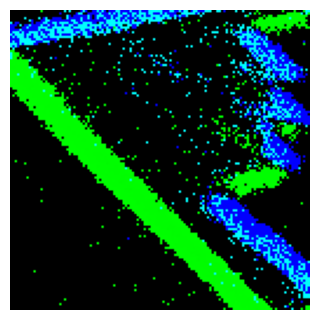

In [20]:
x, label = train_set_CIFAR10DVS[0]

if isinstance(x, np.ndarray):
    x = torch.from_numpy(x)
to_img = torchvision.transforms.ToPILImage()
img_tensor = torch.zeros([x.shape[0], 3, x.shape[2], x.shape[3]])
print(img_tensor.shape)
a = img_tensor[:, 1]
print(a.shape)
img_tensor[:, 1] = x[:, 0]
img_tensor[:, 2] = x[:, 1]

img_list = []
for t in range(img_tensor.shape[0]):
    img_list.append(to_img(img_tensor[t]))
imgP = to_img(img_list)
fig = plt.figure(frameon=False)
fig.set_size_inches(3,3)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

#ax.imshow(img_list[15], aspect='auto')
ax.imshow(imgP, aspect='auto')
#fig.savefig("./../images/airplane.svg", dpi=300)

print(label)
plt.show()

In [13]:
exm = train_set_CIFAR10DVS[0]
exm[0].shape

(16, 2, 128, 128)

In [7]:
np.unique(x)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.], dtype=float32)